# Task 3 - Bifurcation in higher dimensions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from helpers.math import AndronovHopf
from helpers.plots import plot_phase_portrait, plot_orbit


## 3.1 Andronov-Hopf bifurcation

### 3.1.1 Phase portraits of Andronov-Hopf bifurcation

In [37]:
def show_andronov_hopf_phase_plots(alpha: float, savepath: str) -> None:
    """
    Show the phase portrait of the Andronov-Hopf system.

    :param alpha: The parameter alpha
    :type alpha: float
    :param savepath: The path to save the plot to
    :type savepath: str
    """
    x1 = np.arange(-2, 2.0, 0.1)
    x2 = np.arange(-2, 2.0, 0.1)
    X1, X2 = np.meshgrid(x1, x2)
    U, V = AndronovHopf.calc_flows((X1, X2), alpha)

    title = (
        # r"$\dot x_1 = \alpha x_1 - x_2 - x_1(x_1^2 + x_2^2)$"
        # + "\n"
        # + r"$\dot x_2 = x_1 + \alpha x_2 - x_2(x_1^2 + x_2^2)$"
        # + "\n"
        r"Phase portrait for Andronov-Hopf bifurcation, $\alpha = {}$".format(alpha)
    )

    fig, ax = plt.subplots(1, 1, figsize=(7, 7))
    plot_phase_portrait(mesh_tuple=(X1, X2), flow_tuple=(U, V), density=1.5, ax=ax)
    ax.set_xlabel(r"$x_1$")
    ax.set_ylabel(r"$x_2$")
    ax.grid()
    ax.set_title(title)
    fig.tight_layout()
    fig.savefig(f"{savepath}_alpha_{alpha}.pdf")


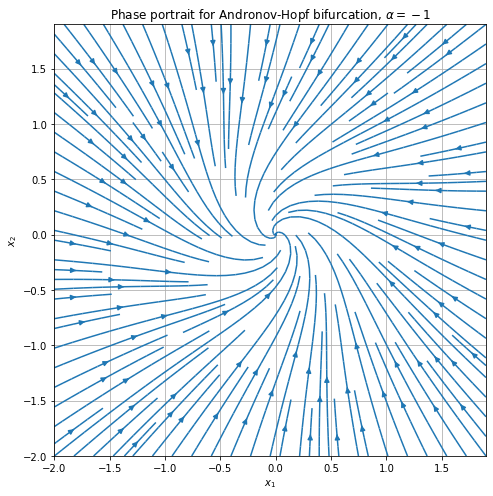

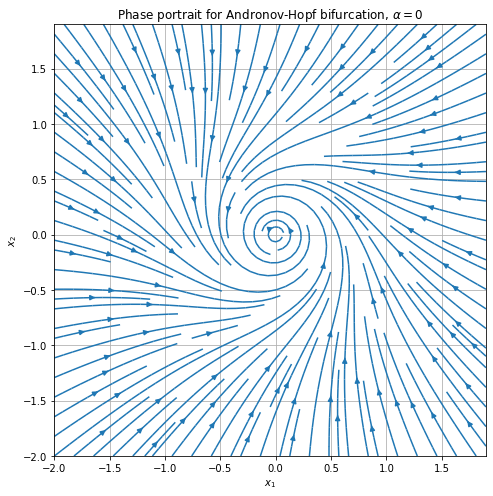

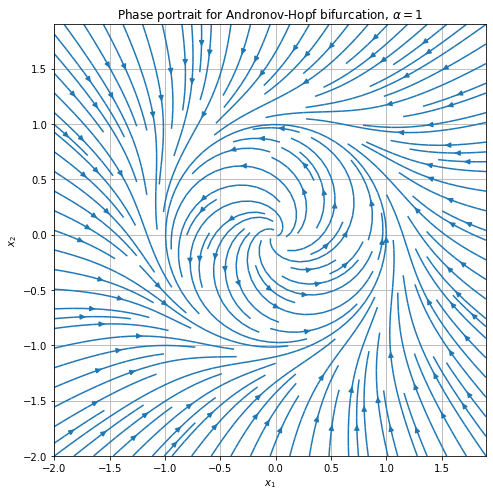

In [38]:
ALPHAS = [-1, 0, 1]
for alpha in ALPHAS:
    path = f"plots/task_3_phase"
    show_andronov_hopf_phase_plots(alpha, path)


### 3.2 Orbits of Andronov-Hopf bifurcation

In [48]:
def show_andronov_hopf_orbit_plots(t: np.ndarray, y0: tuple[float, float], alpha: float, savepath: str) -> None:
    """Plot Orbits of the Andronov-Hopf system.

    param t: The time vector
    type t: np.ndarray
    param y0: The initial conditions (x1, x2)
    type y0: tuple[float, float]
    param alpha: The parameter alpha
    type alpha: float
    param savepath: The path to save the plot to
    type savepath: str
    """
    xlim = [-1.5, 2.5]
    ylim = [-1.5, 1.5]

    X1, X2 = np.meshgrid(np.arange(*xlim, 0.1), np.arange(*ylim, 0.1))
    U, V = AndronovHopf.calc_flows((X1, X2), alpha)

    x1, x2 = AndronovHopf.solve(t, y0, alpha)
    title = r"Orbit for Andronov-Hopf bifurcation, $\alpha = {}$".format(alpha)

    fig, ax = plt.subplots(1, 1, figsize=(7, 7))
    plot_phase_portrait((X1, X2), (U, V), density=1.5, ax=ax, color=(0.1, 0.2, 0.5, 0.1), zorder=1)
    plot_orbit(x1, x2, ax=ax)
    ax.set_xlabel(r"$x_1$")
    ax.set_ylabel(r"$x_2$")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.grid()
    ax.legend()
    ax.set_title(title)
    fig.tight_layout()
    fig.savefig(f"{savepath}_alpha_{alpha}_y0_{y0}.pdf")

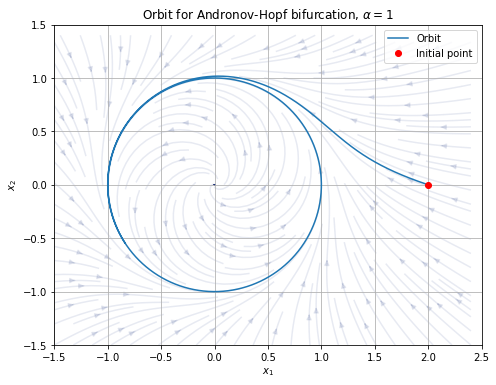

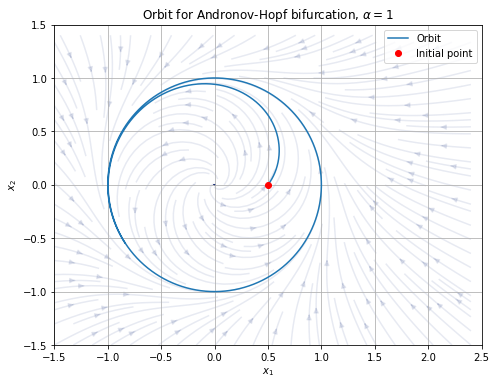

In [49]:
t = np.arange(0, 10, 0.00001)
alpha = 1

xlim = [-1.5, 2.5]
ylim = [-1.5, 1.5]

X1, X2 = np.meshgrid(np.arange(*xlim, 0.1), np.arange(*ylim, 0.1))
U, V = AndronovHopf.calc_flows((X1, X2), alpha)

y0_vec = [(2,0), (0.5,0)]
for y0 in y0_vec:
    show_andronov_hopf_orbit_plots(t, y0, alpha, "plots/task_3_orbit")